In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dna_lengths = 'from-farm/2023-08-07-spillover.dna.lengths.csv'

In [3]:
dnaL = pd.read_csv(dna_lengths)
dnaL.head()

,sequence_name,length
0,EU241637,490
1,EU241638,490
2,EU241639,490
3,EU241640,490
4,EU241641,372


In [4]:
# View summary statistics
print(dnaL['length'].describe())

count     33566.000000
mean       1619.445838
std        6058.977381
min          83.000000
25%         393.000000
50%        1059.000000
75%        2640.000000
max      228162.000000
Name: length, dtype: float64


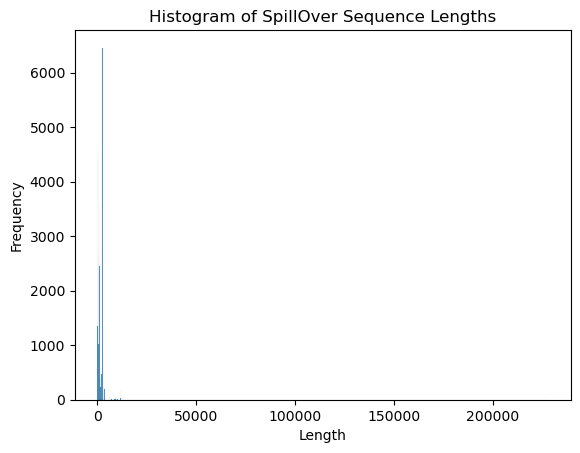

In [5]:
# Plot histogram
sns.histplot(dnaL['length'])
plt.title('Histogram of SpillOver Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
# how many are > 8k?
dnaL[dnaL['length'] >= 8000].shape

(479, 2)

In [13]:
# how many are > 10k?
dnaL[dnaL['length'] >= 10000].shape

(338, 2)

In [14]:
# how many are > 15k?
dnaL[dnaL['length'] >= 15000].shape

(107, 2)

In [21]:
#Truncate for better histogram display
max_length = 10000
dl_trunc = dnaL[dnaL['length'] <= max_length]

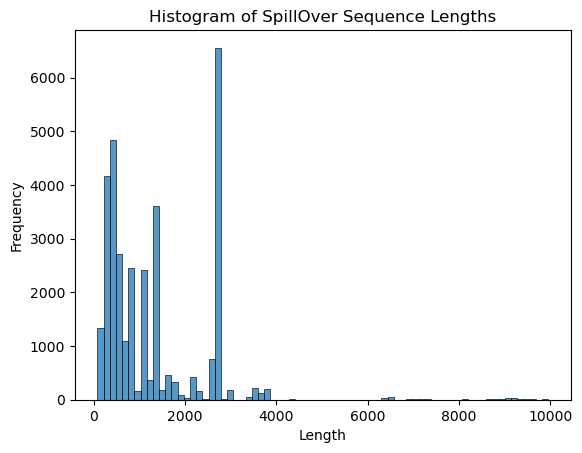

In [22]:
# plothist
sns.histplot(dl_trunc['length'])
plt.title('Histogram of SpillOver Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

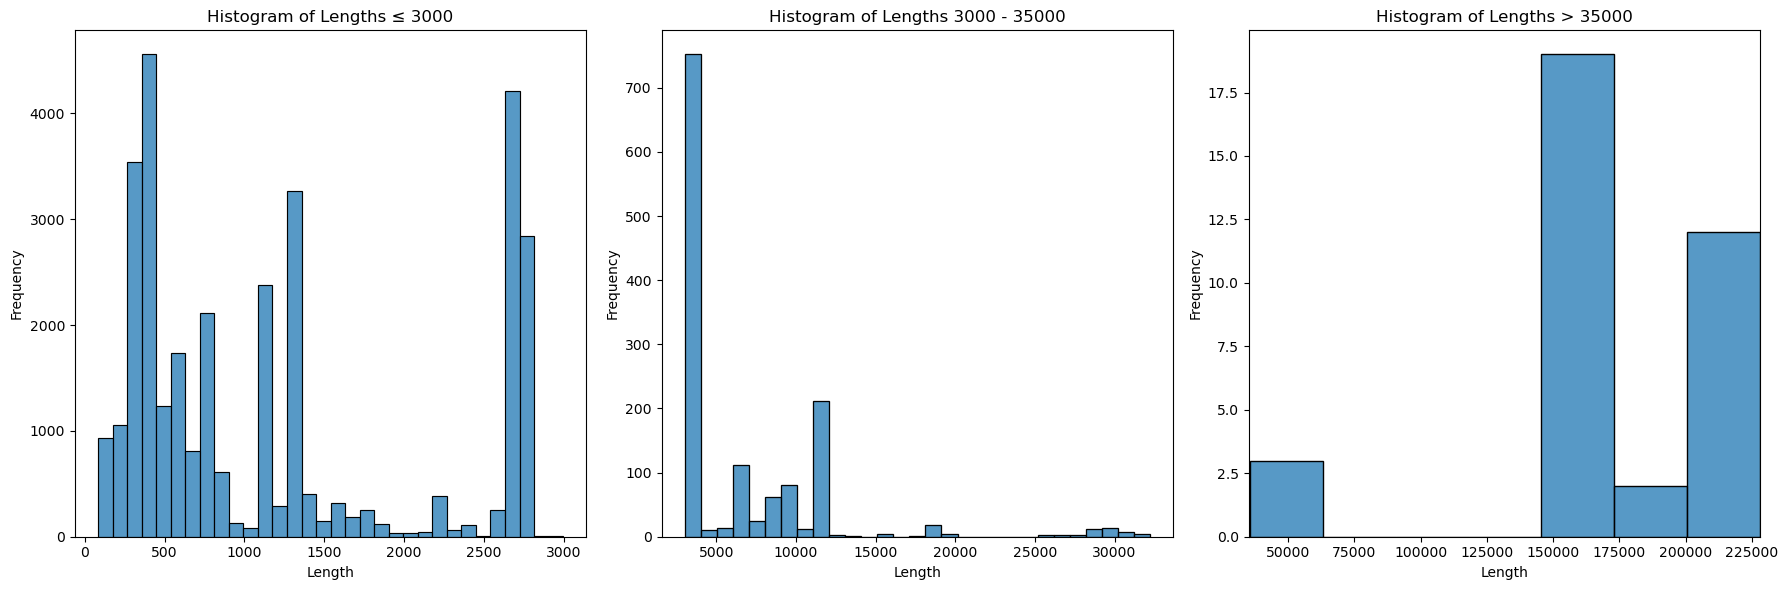

In [18]:
# actually, good splits look like 3k, 35k. let's split and plot
# split
cutoff_low = 3000
cutoff_high = 35000
dl_short = dnaL[dnaL['length'] <= cutoff_low]
df_mid = dnaL[(dnaL['length'] > cutoff_low) & (dnaL['length'] <= cutoff_high)]
dl_longer = dnaL[dnaL['length'] > cutoff_high]

# Creating two subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the histogram for < 3k
sns.histplot(dl_short['length'], ax=axes[0])
axes[0].set_title('Histogram of Lengths ≤ {}'.format(cutoff_low))
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

# mid hist
sns.histplot(df_mid['length'], ax=axes[1])
axes[1].set_title('Histogram of Lengths {} - {}'.format(cutoff_low, cutoff_high))
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Frequency')

# long hist
sns.histplot(dl_longer['length'], ax=axes[2])
axes[2].set_title('Histogram of Lengths > {}'.format(cutoff_high))
axes[2].set_xlabel('Length')
axes[2].set_ylabel('Frequency')
axes[2].set_xlim([cutoff_high, dl_longer['length'].max()])

plt.tight_layout()
plt.show()

In [19]:
# how many are <= 3k?
dnaL[dnaL['length'] <= 3000].shape

(32176, 2)

In [20]:

dnaL[(dnaL['length'] >= 3000) & (dnaL['length'] <= 35000)].shape

(1354, 2)

In [21]:
dnaL[dnaL['length'] >= 35000].shape

(36, 2)